In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('final.csv')
data2=pd.read_csv('final.csv')
data2.head()

,Unnamed: 0,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [2]:
#Finding the number of classes
data3=data2.groupby('Password_Source')['Passwords'].count().reset_index()
data3

,Password_Source,Passwords
0,Hotmail,9812
1,Netflix,1832
2,Yahoo,442838


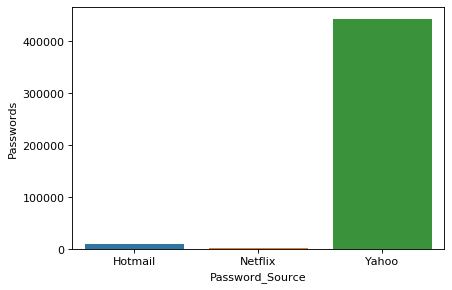

In [3]:
#plotting the length of each class
import seaborn as sns
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Password_Source', y='Passwords', data=data3, estimator=np.median)
plt.show()

In [4]:
#encoding the passwords
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['Passwords'] = number.fit_transform(data['Passwords'].astype('str'))


In [5]:
#Dropping the unecessary columns.
X=data.drop(['Password_Source','Password_Strength','Unnamed: 0',],axis=1)
Y=data.Password_Source




### Oversampling Using Smote

In [6]:
from imblearn.over_sampling import SMOTE
X, Y = SMOTE().fit_sample(X, Y)


In [7]:
X1=pd.DataFrame(data=X,columns=['Passwords','length','Has_Upper','Has_Numeric','Has_SpecialChar','UpperCase_Count','LowerCase_Count','Numeric_Count','SpecialChar_Count','Alphabet_Count','Has_Word','Has_Word','Has_Name','Has_Place']) 
Y1=pd.DataFrame(data=Y,columns=['Password_Source'])
X1['Password_Source']=Y1['Password_Source']


In [8]:
X4=X1.groupby('Password_Source')['Passwords'].count().reset_index()
X4

,Password_Source,Passwords
0,Hotmail,442838
1,Netflix,442838
2,Yahoo,442838


### Plotting the count of each class after oversampling

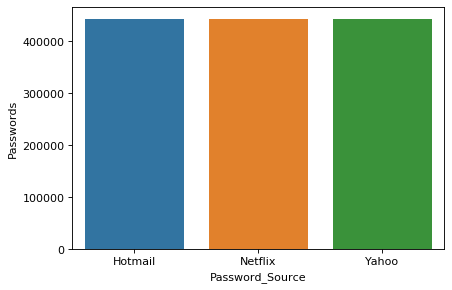

In [9]:
import seaborn as sns
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Password_Source', y='Passwords', data=X4, estimator=np.median)
plt.show()

### Random Forest Classifier

In [10]:
#Splitting the data set into training and testing 
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [11]:
data.name='data'

In [12]:
data.columns

Index(['Unnamed: 0', 'Passwords', 'length', 'Has_Upper', 'Has_Numeric',
       'Has_SpecialChar', 'UpperCase_Count', 'LowerCase_Count',
       'Numeric_Count', 'SpecialChar_Count', 'Alphabet_Count',
       'Password_Source', 'Has_Word', 'Has_Name', 'Has_Place', 'Score',
       'Password_Strength'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf1 = RandomForestClassifier(max_depth=30)
rf1.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
aux_df = data[['Password_Source']].drop_duplicates().sort_values('Password_Source')
results = confusion_matrix(ytest, rf1.predict(xtest))
print(results)

[[127574    936   4056]
 [   740 130948   1130]
 [  9101   1914 122156]]


### Calssification Report for max depth 10

In [23]:
print("Classification report")
print(classification_report(ytest, rf.predict(xtest)))

Classification report
              precision    recall  f1-score   support

     Hotmail       0.70      0.71      0.71    132566
     Netflix       0.63      0.72      0.67    132818
       Yahoo       0.73      0.62      0.67    133171

   micro avg       0.69      0.69      0.69    398555
   macro avg       0.69      0.69      0.69    398555
weighted avg       0.69      0.69      0.69    398555



### Confusion matrix

In [24]:
results = confusion_matrix(ytest, rf.predict(xtest))
print(results)

[[94603 23926 14037]
 [21414 95263 16141]
 [19114 30858 83199]]


Text(0.5, 24.0, 'truth')

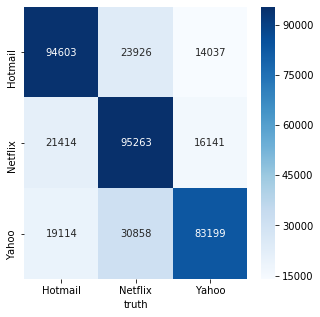

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classification Report for max depth 20

In [26]:
print("Classification report")
print(classification_report(ytest, rf1.predict(xtest)))

Classification report
              precision    recall  f1-score   support

     Hotmail       0.93      0.96      0.95    132566
     Netflix       0.98      0.99      0.98    132818
       Yahoo       0.96      0.92      0.94    133171

   micro avg       0.96      0.96      0.96    398555
   macro avg       0.96      0.96      0.96    398555
weighted avg       0.96      0.96      0.96    398555



In [27]:
results = confusion_matrix(ytest, rf.predict(xtest))
print(results)

[[94603 23926 14037]
 [21414 95263 16141]
 [19114 30858 83199]]


Text(0.5, 24.0, 'truth')

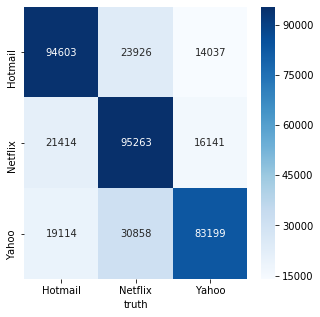

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')